In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [7]:
base_dir = '../images/split/training'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

Found 1600 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])


c:\Users\luft\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
from keras.callbacks import Callback

class BaselineEarlyStopping(EarlyStopping):
    def __init__(self, baseline, **kwargs):
        super(BaselineEarlyStopping, self).__init__(**kwargs)
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            return

        # Only stop training if the baseline is reached
        if current >= self.baseline:
            super(BaselineEarlyStopping, self).on_epoch_end(epoch, logs)

early_stopping = BaselineEarlyStopping(
    monitor='val_accuracy',
    baseline=0.9,
    patience=10,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

In [11]:
history = model.fit(
    train_generator,
    epochs=999999999,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 668ms/step - accuracy: 0.1912 - loss: 1.7095 - val_accuracy: 0.2000 - val_loss: 1.6097
Epoch 2/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 668ms/step - accuracy: 0.2352 - loss: 1.5945 - val_accuracy: 0.1975 - val_loss: 1.6100
Epoch 3/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 705ms/step - accuracy: 0.2594 - loss: 1.5638 - val_accuracy: 0.2150 - val_loss: 1.6214
Epoch 4/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 670ms/step - accuracy: 0.2925 - loss: 1.5338 - val_accuracy: 0.2575 - val_loss: 1.6182
Epoch 5/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 658ms/step - accuracy: 0.3117 - loss: 1.4869 - val_accuracy: 0.2275 - val_loss: 1.7127
Epoch 6/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 669ms/step - accuracy: 0.3570 - loss: 1.4222 - val_accuracy: 0.4125 - val_loss: 1.4310
Epoch 7/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 756ms/step - accuracy: 0.4660 - loss: 1.2512 - val_accuracy: 0.4400 - val_loss: 1.5030
Epoch 8/999999999
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

13/13 [==============================] - 1s 66ms/step - loss: 0.3853 - accuracy: 0.9000
Validation accuracy: 90.00%


In [ ]:
# def predict_uploaded_image(model, img_path):
#     img = image.load_img(img_path, target_size=(150, 150))
#     imgplot = plt.imshow(img)
#     plt.show()

#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0) / 255.

#     predictions = model.predict(img_array)
#     classes = ['paper', 'rock', 'scissors']
#     predicted_class = classes[np.argmax(predictions)]

#     return predicted_class

# uploaded = files.upload()

# for fn in uploaded.keys():
#     predicted_class = predict_uploaded_image(model, fn)
#     print(f'Gambar {fn} diprediksi sebagai: {predicted_class}')

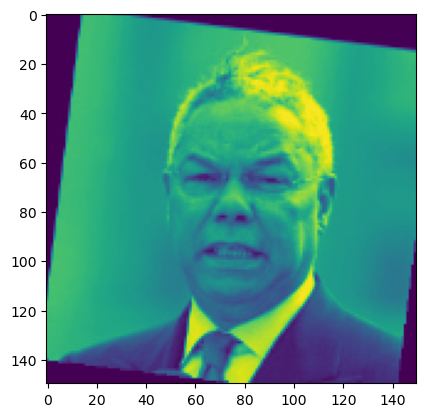

1/1 [==============================] - 0s 74ms/step
Gambar diprediksi sebagai: Colin


In [ ]:
img_path = "../images/split/testing/Colin_Powell/image_3.png"

img = image.load_img(img_path, target_size=(150, 150), color_mode='grayscale')
imgplot = plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.

predictions = model.predict(img_array)
classes = ['Colin', 'Donald', 'George', 'Gerhard', 'Tony']
predicted_class = classes[np.argmax(predictions)]


print(f'Gambar diprediksi sebagai: {predicted_class}')